<a href="https://colab.research.google.com/github/remre/striveschool/blob/main/DLStudies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deep Learning with Examples**

##**MNIST Example**

In [ ]:
#to start with we need to import necessary library
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm
from torchvision import datasets, transforms
import torch.nn.functional as F

In [ ]:
#we need to give True for the train set and for transform just use ToTensor and to enhance our model we will use RandomHorizantalFlip
train_transform = transforms.Compose([transforms.ToTensor(), transforms.RandomHorizontalFlip()])

mnist_train = datasets.MNIST(root = './datasets',train = True, transform = train_transform, download = True) # 


mnist_test = datasets.MNIST(root = './datasets', train = False, transform = transforms.ToTensor(), download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:

print(f'mnist_train length is {len(mnist_train)}')
print(f'mnist_test lenght is {len(mnist_test)}')

mnist_train length is 60000
mnist_test lenght is 10000


In [ ]:
image, label = next(iter(mnist_train))# we will seperate labels and images as u can see

In [ ]:
image

In [ ]:
print(f'images shape: {image.shape}')

images shape: torch.Size([1, 28, 28])


Reshaped image shape: torch.Size([1, 28, 28])


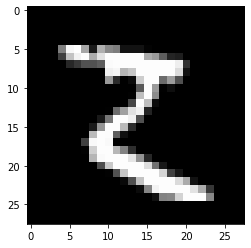

In [ ]:
print("Reshaped image shape: {}".format(image.shape))
image = image.reshape([28,28])
plt.imshow(image, cmap="gray")

In [ ]:
trainloader = torch.utils.data.DataLoader(mnist_train,batch_size = 100, shuffle= True) #batch size is blabalba  shuffle is shuffling it 
testloader = torch.utils.data.DataLoader(mnist_test, batch_size= 100, shuffle = False) #dont need to shuffle testloader

In [ ]:
images, labels = next(iter(trainloader))

In [ ]:
print(f'the shape of images and labels are expressed in order:{images.shape,labels.shape} \nfirst value of images stands for batch size second is channel\nthen height and width of image ')

the shape of images and labels are expressed in order:(torch.Size([100, 1, 28, 28]), torch.Size([100])) 
first value of images stands for batch size second is channel
then height and width of image 


Now we can go through the next step which is forward pass

Thus, we're going to be treating the input as flat vectors. To convert our inputs into row vectors (a.k.a. flattening), we can use view(), the equivalent of NumPy's reshape()


 Also like NumPy, we can replace one of the dimensions of the reshaping with a -1, which tells PyTorch to infer this dimension based on the original dimensions and the other specified dimensions.

In [ ]:
x = images.view(-1,28*28)
print(x.shape)

torch.Size([100, 784])


In [ ]:
# Randomly initialize weights W
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()


# Initialize bias b as 0s
b = torch.zeros(10, requires_grad=True)

As both W and b are parameters we wish to learn, we set **requires_grad** to True. This tells PyTorch's autograd to track the gradients for these two variables, and all the variables depending on W and b.

With these model parameters, we compute  𝑦 :

In [ ]:
# Linear transformation with W and b
y = torch.matmul(x, W) + b

the softmax achieves the desired property of producing values between 0 and 1 that sum to 1.

In [ ]:
# Option 1: Softmax to probabilities from equation
py_eq = torch.exp(y) / torch.sum(torch.exp(y), dim=1, keepdim=True)
print("py[0] from equation: {}".format(py_eq[0]))

# Option 2: Softmax to probabilities with torch.nn.functional

py = F.softmax(y, dim=1)
print("py[0] with torch.nn.functional.softmax: {}".format(py[0]))

py[0] from equation: tensor([0.0737, 0.1074, 0.0684, 0.0940, 0.1117, 0.0882, 0.1535, 0.0379, 0.1340,
        0.1311], grad_fn=<SelectBackward>)
py[0] with torch.nn.functional.softmax: tensor([0.0737, 0.1074, 0.0684, 0.0940, 0.1117, 0.0882, 0.1535, 0.0379, 0.1340,
        0.1311], grad_fn=<SelectBackward>)


###Loss Functions

We will execute cross entropy for the mnist model however this section includes some other examples of loss either

CrossEntropy combines LogSoftmax and NLLLoss in one single class.

In [ ]:
# Cross-entropy loss from equation
cross_entropy_eq = torch.mean(-torch.log(py_eq)[range(labels.shape[0]),labels])
print("cross entropy from equation: {}".format(cross_entropy_eq))

# Option 2: cross-entropy loss with torch.nn.functional
cross_entropy = F.cross_entropy(y, labels)
print(f"cross entropy with torch.nn.functional.cross_entropy: {cross_entropy}" )

cross entropy from equation: 2.340156078338623
cross entropy with torch.nn.functional.cross_entropy: 2.340156078338623


In [ ]:
[range(labels.shape[0]),labels]

[range(0, 100),
 tensor([2, 5, 3, 5, 5, 0, 3, 6, 3, 2, 9, 0, 2, 2, 8, 0, 3, 2, 3, 8, 6, 2, 0, 1,
         1, 1, 4, 8, 8, 6, 3, 9, 2, 7, 4, 6, 9, 6, 0, 6, 3, 9, 1, 8, 1, 3, 6, 4,
         0, 7, 1, 4, 8, 0, 4, 3, 7, 0, 3, 5, 3, 7, 4, 2, 9, 6, 0, 1, 6, 9, 7, 7,
         6, 8, 2, 4, 8, 2, 7, 1, 2, 6, 9, 7, 0, 6, 9, 5, 1, 1, 1, 1, 0, 5, 6, 1,
         1, 0, 1, 6])]

In [ ]:
torch.mean(images)

tensor(0.1316)

####Mean Squared Logarithmic Error Loss

There may be regression problems in which the target value has a spread of values and when predicting a large value, you may not want to punish a model as heavily as mean squared error.


As a loss measure, it may be more appropriate when the model is predicting unscaled quantities directly. Nevertheless, we can demonstrate this loss function using our simple regression problem.

####NLLLOSS

The negative log likelihood loss. It is useful to train a classification problem with C classes.


Obtaining log-probabilities in a neural network is easily achieved by adding a LogSoftmax layer in the last layer of your network. You may use CrossEntropyLoss instead, if you prefer not to add an extra layer.

###Binary Cross-Entropy Loss


This is used for measuring the error of a reconstruction in for example an auto-encoder. Note that the targets yy should be numbers between 0 and 1.

####GAUSSIANNLLLOSS

torch.nn.GaussianNLLLoss

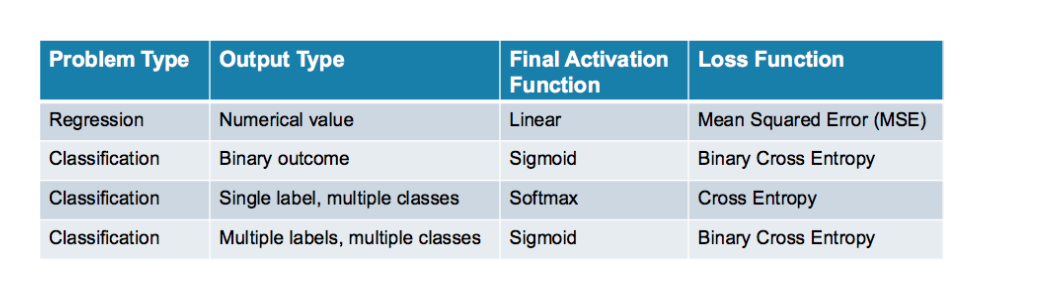

###The Backwards Pass

We can improve our model by changing the parameters in a way that minimizes the loss.

 For neural networks, the common way of doing this is with backpropagation: we take the gradient of the loss with respect to  𝑊  and  𝑏  and take a step in the direction that reduces our loss.

 First, we need to create an optimizer. There are many choices, but since logistic regression is fairly simple, we'll use standard stochastic gradient descent (SGD)

In [ ]:
optimizer = torch.optim.SGD([W,b], lr=0.1,momentum=5)

When we created our parameters  𝑊  and  𝑏 , we indicated that they 



require gradients. To compute the gradients for  𝑊  and  𝑏 , we call the backward() function on the cross-entropy loss.

In [ ]:
cross_entropy.backward()

Each of the variables that required gradients have now accumulated gradients. We can see these for example on b:

In [ ]:
b.grad

tensor([-0.0105, -0.0324, -0.0115, -0.0233,  0.0395,  0.0491, -0.0290, -0.0149,
         0.0297,  0.0034])

To apply the gradients, we have an optimizer, we can tell it to perform 


the update step for us:

In [ ]:
optimizer.step()

In [ ]:
b

tensor([ 0.0011,  0.0032,  0.0012,  0.0023, -0.0040, -0.0049,  0.0029,  0.0015,
        -0.0030, -0.0003], requires_grad=True)

In [ ]:
print("b.grad before zero_grad(): {}".format(b.grad))
optimizer.zero_grad()
print("b.grad after zero_grad(): {}".format(b.grad))

b.grad before zero_grad(): tensor([-0.0105, -0.0324, -0.0115, -0.0233,  0.0395,  0.0491, -0.0290, -0.0149,
         0.0297,  0.0034])
b.grad after zero_grad(): tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [ ]:
for images, labels in (iter(trainloader)):
    # Zero out the gradients
    optimizer.zero_grad()
    
    # Forward pass
    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b
    cross_entropy = F.cross_entropy(y, labels)
    # Backward pass
    cross_entropy.backward()
    optimizer.step()

You'll commonly finding yourself needing to reshape tensors while building CNNs. The PyTorch function for doing so is view(). Anyone familiar with NumPy will find it very similar to np.reshape(). Importantly, the new dimensions must be chosen so that it is possible to rearrange the input into the shape of the output (i.e. the total number of elements must be the same). As with NumPy, you can optionally replace one of the dimensions with a -1, which tells torch to infer the missing dimension

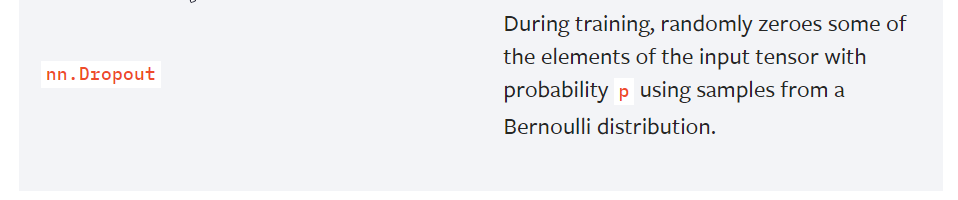